In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [3]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
class_names = training_ds.class_names

Found 3491 files belonging to 4 classes.


In [4]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 700 files belonging to 4 classes.


In [8]:
class_names

['Accident', 'Non Accident', 'dense_traffic', 'sparse_traffic']

In [14]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    # Add a dropout layer with a rate of 0.25
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 10)

Epoch 1/10
35/35 [==============================] - 243s 7s/step - loss: 2.4154 - accuracy: 0.4724 - val_loss: 3.1489 - val_accuracy: 0.3400
Epoch 2/10
35/35 [==============================] - 235s 7s/step - loss: 0.7140 - accuracy: 0.6820 - val_loss: 1.4718 - val_accuracy: 0.5371
Epoch 3/10
35/35 [==============================] - 237s 7s/step - loss: 0.5636 - accuracy: 0.7728 - val_loss: 0.8760 - val_accuracy: 0.6800
Epoch 4/10
35/35 [==============================] - 233s 7s/step - loss: 0.4635 - accuracy: 0.8164 - val_loss: 0.9932 - val_accuracy: 0.6457
Epoch 5/10
35/35 [==============================] - 2061s 60s/step - loss: 0.4063 - accuracy: 0.8364 - val_loss: 0.7047 - val_accuracy: 0.7400
Epoch 6/10
35/35 [==============================] - 222s 6s/step - loss: 0.2717 - accuracy: 0.8937 - val_loss: 0.7326 - val_accuracy: 0.7300
Epoch 7/10
35/35 [==============================] - 226s 6s/step - loss: 0.2024 - accuracy: 0.9218 - val_loss: 0.7619 - val_accuracy: 0.7571
Epoch 8/10


4/4 [==============================] - 2s 408ms/step


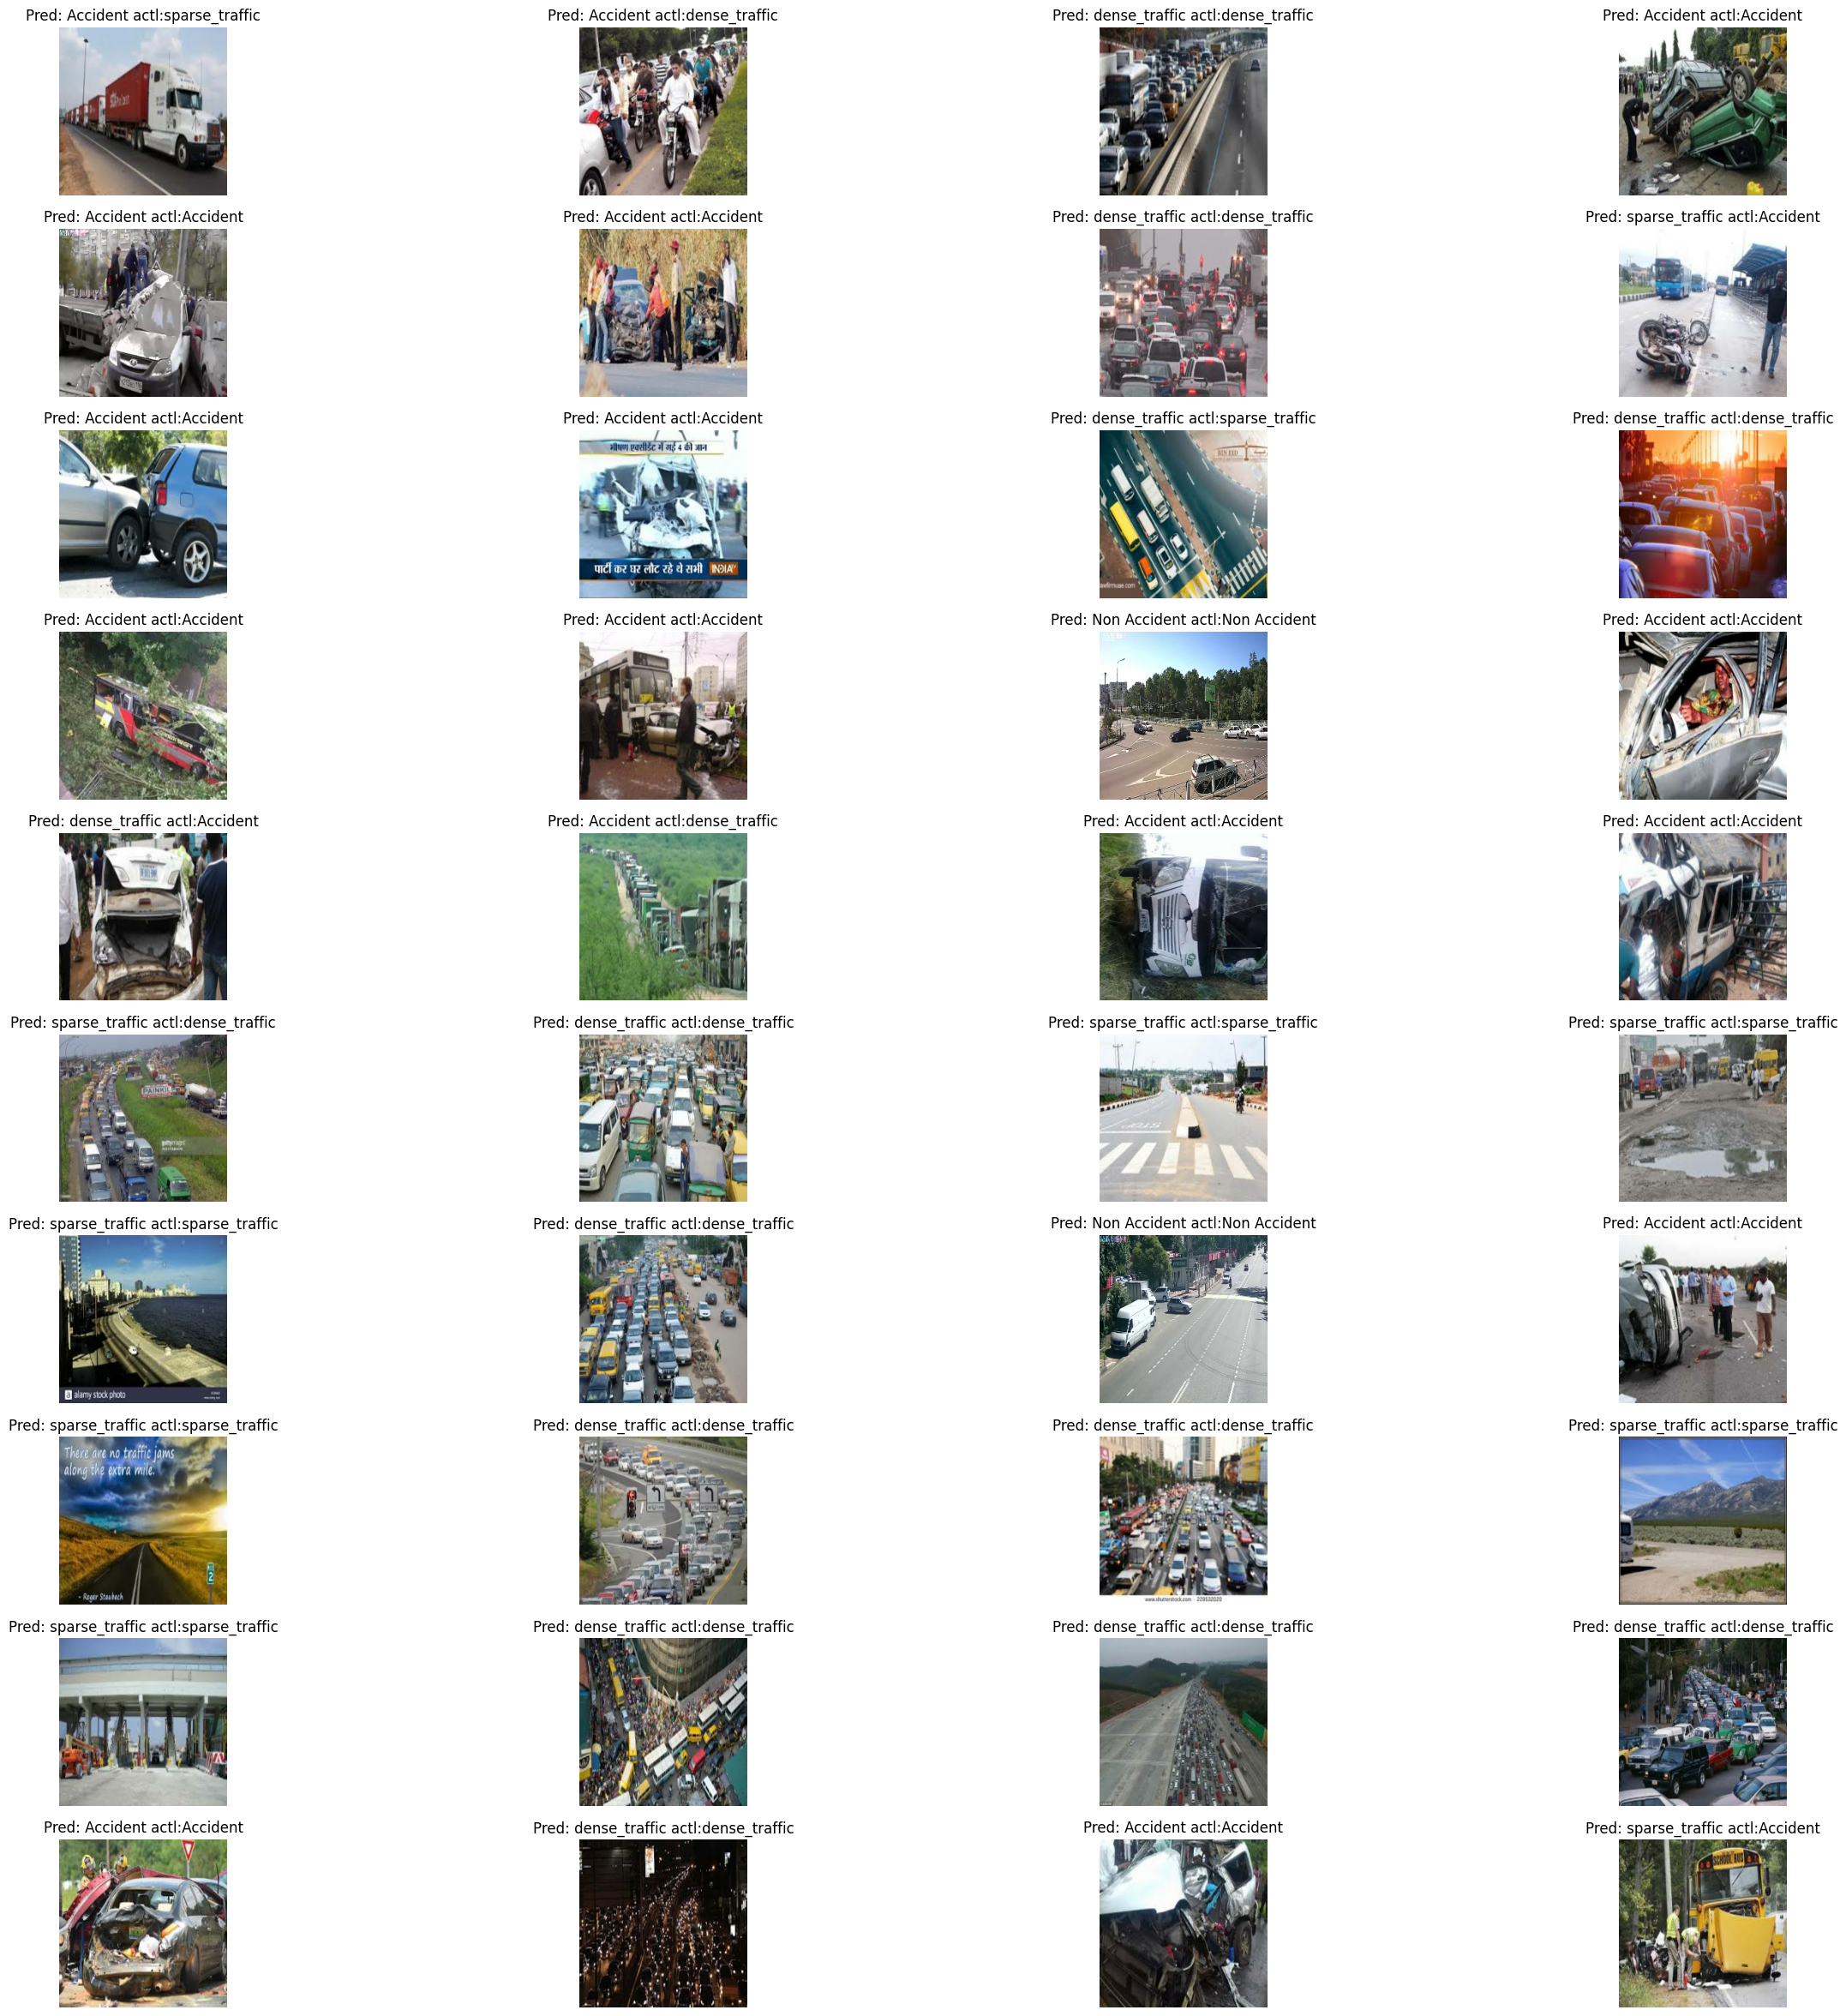

In [16]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [17]:
import pickle
pickle.dump(MyCnn, open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://08cda27a-9ee3-486f-b385-6d9bbbca7d93/assets


INFO:tensorflow:Assets written to: ram://08cda27a-9ee3-486f-b385-6d9bbbca7d93/assets


In [21]:
# model = pickle.load(open('model.pkl','rb'))
# model.predict(testing_ds)
MyCnn.save('model.h5')

In [5]:
loaded_model = tf.keras.models.load_model('model.h5')
# loaded_model.predict(testing_ds)

In [6]:
import cv2

In [7]:
def inputTransform(imgPath):
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert the image to Tensor
    img_to_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    img_re = tf.image.resize(img_to_tensor, [250, 250])
    new_image = tf.expand_dims(img_re, 0)    
    return new_image

In [10]:
def printLabel(image):
    testImage = inputTransform(image)
    loaded_model = tf.keras.models.load_model('model.h5')
    y_pred = loaded_model.predict(testImage)
    # print([class_names[y_pred.argmax(axis=0)] for y_pred in y_pred])
    return ([class_names[y_pred.argmax(axis=0)] for y_pred in y_pred])

In [11]:
testImage = inputTransform('frame_74.jpg')
check = printLabel('frame_74.jpg')
print(check)


1/1 [==============================] - 0s 437ms/step
['dense_traffic']
